### 변화를 알 수 있다.
 - 도면의 차이
 - 전자제품의 PCB회로의 오류
 - 카메라로 촬영한 영상에 실시간을 움직임이 있는지

In [7]:
import numpy as np, cv2
import matplotlib.pyplot as plt

(800, 900) (800, 900)


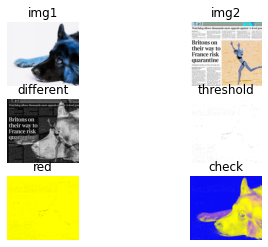

In [47]:
img1 = cv2.imread('./img/dog_01.jpg')
img2 = cv2.imread('./img/newspaper_01.jpg')

img1 = img1[:800,400:1300]
img2 = img2[200:1000,:900]

img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


print(img1_gray.shape, img2_gray.shape)
# 두 영상의 절대 값 차 연산
diff = cv2.absdiff(img1_gray,img2_gray)

# 차 영상을 극대화 하기 위해 threshould처리 및 컬러로 변환
_,diff2 = cv2.threshold(diff,1,255,cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff2,cv2.COLOR_GRAY2RGB)
diff_red[:,:,2] = 0

# 변화 부분 표시
spot = cv2.bitwise_xor(img1,diff_red)

imgs = {'img1':img1, 'img2':img2, 'different':diff, 'img1':img1, 'threshold': diff2, 'red': diff_red, 'check':spot}

for i ,(key,value) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(key)
    plt.imshow(value,'gray')
    plt.axis('off')
    plt.show

### 이미지 합성과 마스킹

(837, 1599, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

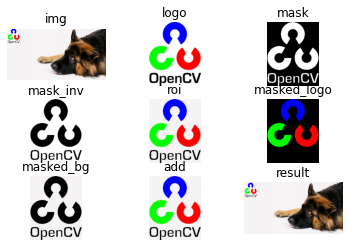

In [105]:
path = './img/dog_01.jpg'
logopath = './img/logo.png'

img = cv2.imread(path)
logo = cv2.imread(logopath,cv2.IMREAD_UNCHANGED)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#logo = cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)

print(img.shape)
_, mask1 = cv2.threshold(logo[:,:,2],1,255,cv2.THRESH_BINARY)
_, mask2 = cv2.threshold(logo[:,:,1],1,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_and(mask1,mask2)
mask = cv2.bitwise_not(mask_inv)

h,w = mask.shape[:2]
roi = img[10:10+h,10:10+w]

masked_logo = cv2.bitwise_and(logo,logo,mask=mask)
masked_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)

added = masked_bg + masked_logo
img[10:10+h,10:10+w]=added

imgs = {'img':img, 'logo':logo, 'mask':mask, 'mask_inv':mask_inv, 'roi':roi, 'masked_logo':masked_logo, 'masked_bg':masked_bg,\
       'add':added, 'result':img}

for i ,(key,value) in enumerate(imgs.items()):
    plt.subplot(3,3,i+1)
    plt.title(key)
    plt.imshow(value,'gray')
    plt.axis('off')


plt.show